### Import libraries

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Import data

In [2]:
train = np.loadtxt('./data/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./data/test.csv', delimiter=',', skiprows=1)

In [3]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [4]:
train_img.shape

(42000, 28, 28)

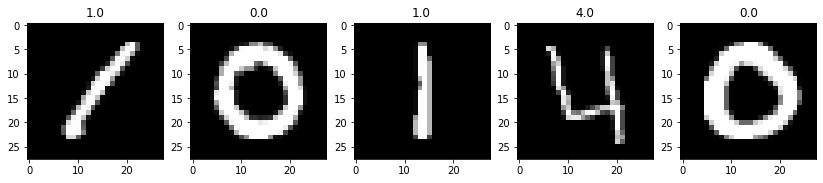

In [5]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

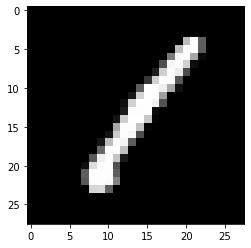

In [26]:
plt.imshow(train_img[0], cmap='gray')

### HOG feature extraction example

In [12]:
from skimage.feature import hog

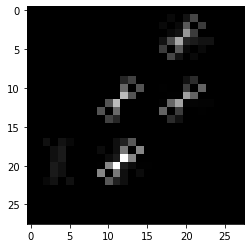

In [41]:
#creating hog features
fd, hog_image = hog(train_img[0], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3,3), visualize=True)
plt.imshow(hog_image, cmap="gray")

### HOG feature extraction Train

In [68]:
hog_images = []
hog_features = []
for img in train_img:
    fd,hog_image = hog(img, orientations=9, pixels_per_cell=(8,8),cells_per_block=(3,3),block_norm= 'L2',visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

In [69]:
hog_features_array = np.array(hog_features)

In [70]:
hog_features_array.shape

(42000, 81)

### SVC with default hyperparameters

In [72]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(train_label, hog_features_array, test_size=0.2, random_state=42)

In [73]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC() 
svc.fit(x_train,y_train)
y_pred=svc.predict(x_val)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_val, y_pred)))

Model accuracy score with default hyperparameters: 0.9736


In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       816
         1.0       0.98      0.99      0.99       909
         2.0       0.97      0.98      0.97       846
         3.0       0.98      0.96      0.97       937
         4.0       0.98      0.97      0.98       839
         5.0       0.98      0.98      0.98       702
         6.0       0.97      0.99      0.98       785
         7.0       0.97      0.96      0.97       893
         8.0       0.95      0.96      0.96       835
         9.0       0.95      0.96      0.96       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



### HOG feature extraction Test

In [77]:
test_img.shape

(28000, 28, 28)

In [78]:
hog_images_test = []
hog_features_test = []
for img in test_img:
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8,8),cells_per_block=(3,3),block_norm= 'L2',visualize=True)
    hog_images_test.append(hog_image)
    hog_features_test.append(fd)

In [79]:
hog_features_test_array = np.array(hog_features_test)

In [80]:
hog_features_test_array.shape

(28000, 81)

### Predict values Test

In [81]:
y_pred_test=svc.predict(hog_features_test_array)

In [82]:
y_pred_test

array([2., 0., 9., ..., 3., 9., 2.])

### File generation

In [87]:
with open('submit_svm.csv', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(y_pred_test, 1):
        dst.write('%s,%s\n' % (i, int(p)))

In [88]:
!head submit_svm.csv

ImageId,Label
1,2
2,0
3,9
4,0
5,3
6,7
7,0
8,3
9,0


### Kaggle submission score

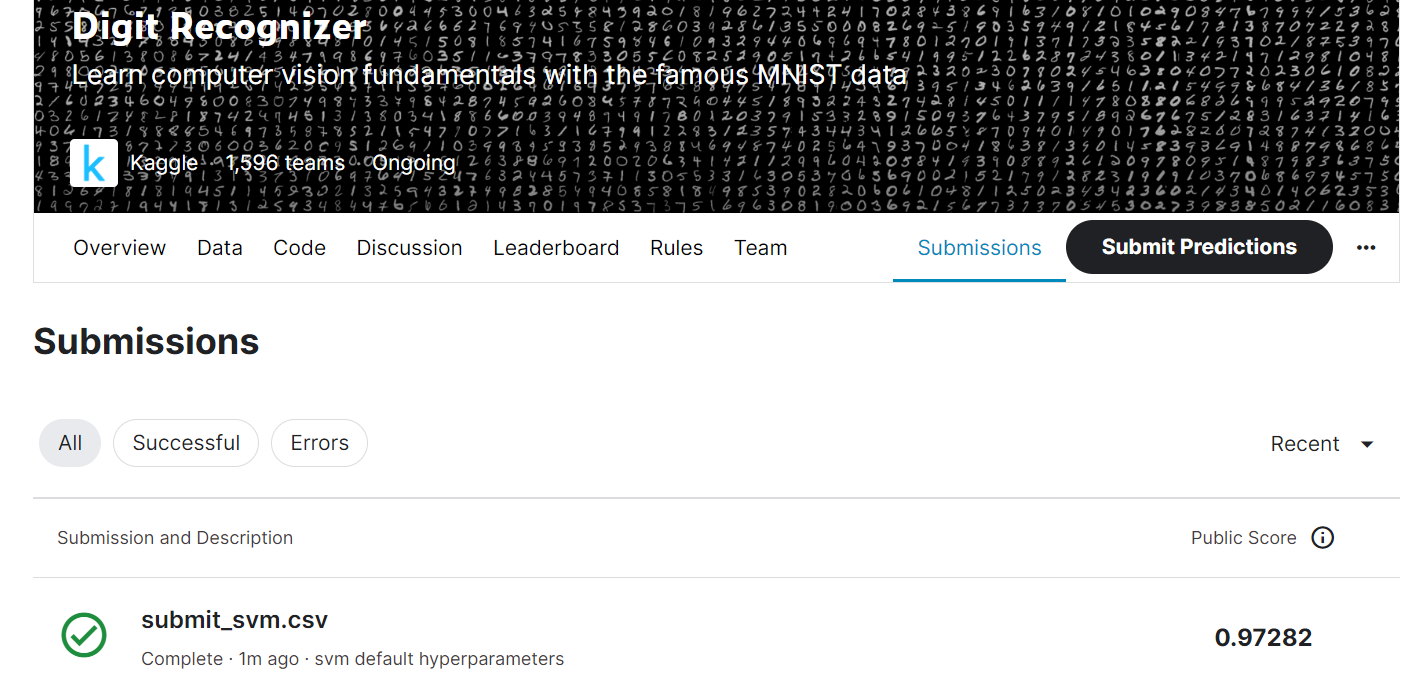